## XYZ Corp Lending Club: Loan Analysis & Default probability prediction
> Credit risk is one of the major issues in financial researches. Over the past few years, many companies fall apart and were forced into bankruptcy or to a significantly constrained business activity, because of deteriorated financial and economic situation. This notebook contains solution to create a predictive model that identifies applicants who are relatively risky for a loan. Expressing why some companies or individuals do default while others don’t and what are the main factors that drive credit risk and how to build robust credit model for financial stability.

### As per the problem statement, we have organized the whole series into below sections:
1: Reading the dataset txt file and Understanding the data  
2: Exploratory Data Analysis (EDA)  

      Data Cleaning  
      Plots to study trends
      Variable Transformations  
3: Feature engineering and Variable Selection  
4: Model Building and Validation  

    Preprocessing  
    Model Building, testing and validation  
    Model selection  
5: Final results  

The codes for each of these steps are as follows,

# 1: Reading and Understanding the data
Under this section we will be reading the original txt file, checking for the data, cleaning and removing unnecessary features.  
Identify constant features, duplicate feature, duplicate rows, and features with a high number of missing values.

In [7]:
# Importing all the required libraries

import pandas as pd               # For reading csv files
import numpy as np                # For mathematical functions
import matplotlib.pyplot as plt   # For plotting graphs
import seaborn as sns             # Plotting helper library
import math
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_curve,auc,precision_score,f1_score

In [6]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Priya' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
# Setting the display options
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
pd.set_option('display.expand_frame_repr', False)

In [9]:
# Reading the txt file with separator as tab, parsing the issue_d date while reading itself and setting low memory = false
xyzcorp = pd.read_csv('E:\\XYZCorp_LendingData.txt',sep = '\t',parse_dates=['issue_d'],low_memory=False)

In [10]:
# Getting information of the dataset, like total columns present, there data type and other parameters related to the columns.  
xyzcorp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan   

In [11]:
# gives the no. of rows and columns in the dataset
xyzcorp.shape

(855969, 73)

In [12]:
# displays the first 5 rows of the dataset
xyzcorp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
# displays the last 5 rows of the dataset
xyzcorp.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,2015-01-01,n,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,2015-01-01,n,NaN,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,29.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,140285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,2015-01-01,n,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,2015-01-01,n,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,2015-01-01,n,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


In [14]:
# to get the summary of all the varibles/columns in the dataset
xyzcorp.describe(include = "all")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969,855969.000000,855969.000000,855969,855969,806526,812908,855969,8.559690e+05,855969,855969,855969,121812,855969,855936,855969,855969,855969.000000,855969.000000,855969,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,847107,855969.000000,602998,855919,855913.000000,213139.000000,855969.0,855969,442.000000,440.000000,442,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,290912,11,6,NaN,3,103,2,120335,14,60991,931,51,NaN,NaN,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,3,102,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Source Verified,2015-10-01 00:00:00,n,,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Aug-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-2016,NaN,Feb-2016,Jan-2016,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,Not Verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,600221,NaN,NaN,247998,54958,12965,282090,429106,NaN,318178,48212,855964,231,505392,398089,9466,125172,NaN,NaN,6433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467510,NaN,534094,701687,NaN,NaN,NaN,855527,NaN,NaN,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,NaN,13.192320,436.238072,NaN,NaN,NaN,NaN,NaN,7.507119e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.122165,0.311621,NaN,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,NaN,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,NaN,2225.985295,NaN,NaN,0.014230,44.101450,1.0,NaN,107412.163982,18.318477,NaN,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.48699

In [15]:
# creating copy of original dataset
xyzcorp_bkp = xyzcorp.copy()

# 2: Exploratory Data Analysis (EDA)


## Data Cleaning
### Remove features associated with 75% missing values:
   In the code below, we have used pandas built-in method ‘isnull()’ to find the rows associated with missing values. 
   Then we have sum them up to get the count for each feature. Finally, sorting of the features according to the number of missing values and create a data frame for further analysis.

In [16]:
# To check for missing values % for each variable
# method to get the total and percent of null values for the variables
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.shape[0]).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
    missing_data.reset_index(inplace=True)
    missing_data.rename(columns={'index': 'feature_name'}, inplace=True)   
    return missing_data

missing_data_count = draw_missing_data_table(xyzcorp)
missing_data_count

,feature_name,Total,Percent
0,dti_joint,855529,0.999486
1,verification_status_joint,855527,0.999484
2,annual_inc_joint,855527,0.999484
3,il_util,844360,0.986438
4,mths_since_rcnt_il,843035,0.984890
5,total_bal_il,842681,0.984476
6,inq_last_12m,842681,0.984476
7,open_acc_6m,842681,0.984476
8,open_il_6m,842681,0.984476
9,open_il_24m,842681,0.984476


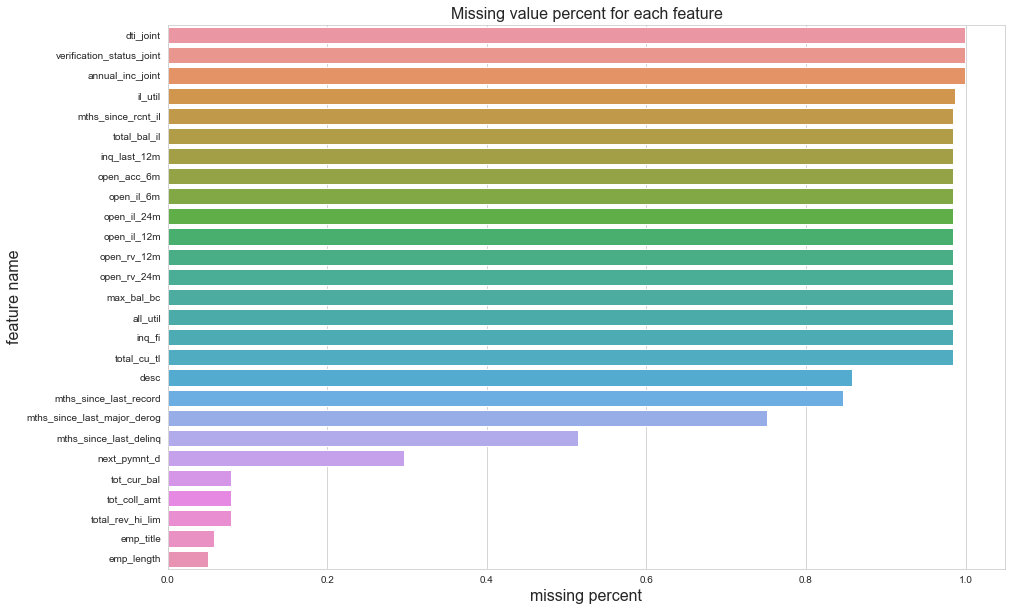

In [17]:
# Selecting variables which have missing value percent greater than .03
missing_data_count_show = missing_data_count[missing_data_count["Percent"] > 0.03]

# Plotting of graph, showing the variables having more than .03 percent null values
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=missing_data_count_show["Percent"], y=missing_data_count_show["feature_name"], ax=ax)
ax.set_title("Missing value percent for each feature", fontsize=16)
ax.set_xlabel('missing percent', fontsize=16)
ax.set_ylabel('feature name', fontsize=16)
plt.show()
plt.close()

In [18]:
# sorting of the features according to the number of missing values > 0.75 and create a data frame for further analysis.

var_null_pc=xyzcorp.isna().sum(axis=0).sort_values( ascending=False)/float(len(xyzcorp))
var_null_pc[ var_null_pc > 0.75 ]

dti_joint                      0.999486
verification_status_joint      0.999484
annual_inc_joint               0.999484
il_util                        0.986438
mths_since_rcnt_il             0.984890
total_bal_il                   0.984476
inq_last_12m                   0.984476
open_acc_6m                    0.984476
open_il_6m                     0.984476
open_il_24m                    0.984476
open_il_12m                    0.984476
open_rv_12m                    0.984476
open_rv_24m                    0.984476
max_bal_bc                     0.984476
all_util                       0.984476
inq_fi                         0.984476
total_cu_tl                    0.984476
desc                           0.857691
mths_since_last_record         0.846742
mths_since_last_major_derog    0.750997
dtype: float64

In [19]:
# Using pandas drop method to remove columns which have null value of more than 75% from the dataset. 
# Setting the “inplace” option to True” removes these features from original data frame without returning anything.

xyzcorp.drop( var_null_pc[ var_null_pc > 0.75 ].index, axis = 1, inplace = True )
xyzcorp.dropna( axis = 0, thresh = 30, inplace = True )

# checking for the row and column count after removing the columns with null values
xyzcorp.shape

(855969, 53)

### Removal of constant features:
Removing features that have a single unique value.
A feature associated with one unique value does not help the model to generalize well since it’s variance is zero. 
A tree-based model cannot take advantage of these type of features since the model can not split these features.

In [20]:
# Method “find_constant_features” identifies constant features. It goes through each feature and sees if it has less than two 
# unique values. If so, the features are added to the constant feature list.
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

In [21]:
# Dropping of columns with constant value
const_features = find_constant_features(xyzcorp)
print(const_features)

xyzcorp.drop(const_features, axis = 1, inplace = True)
xyzcorp.shape

['policy_code']


(855969, 52)

In [22]:
# Making copy of dataset after removal of columns having missing value more than 0.75
corpxyz_bkp_aftrRemvMissVal = xyzcorp.copy()

In [23]:
corpxyz_bkp_aftrRemvMissVal.shape

(855969, 52)

### Plots/GRAPHS to analyse the Features and study trends

### a: Loan Amount Requested Verus the Funded Amount
It important to discover the relationship between loan amount requested verus the funded amount to see if Lending Club ever issues a lower amount than what is asked and why.
Doing a quick santiy check, we see there are 1917 instances in the data where the reuqested amount doesn't match the funded.

In [24]:
print((xyzcorp.loan_amnt != xyzcorp.funded_amnt).value_counts())

False    854052
True       1917
dtype: int64


Mean loan amount is: 14745.571334943204


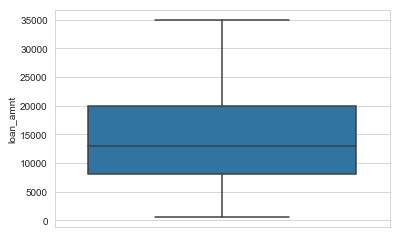

In [25]:
# LOAN AMOUNT DISTRIBUTION:
sns.boxplot(y=xyzcorp.loan_amnt)
print("Mean loan amount is:" ,xyzcorp.loan_amnt.mean())
# Conclusion: Most loans are between 10000 and 20000 dollars

Text(0.5, 1.0, 'Total committed by Investors')

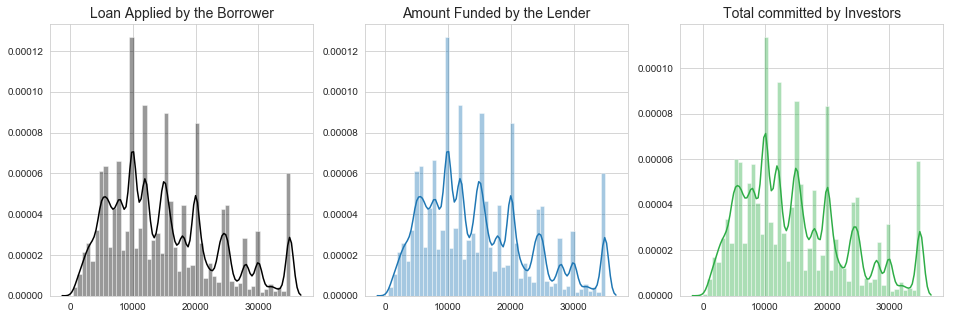

In [26]:
# Making a plot with 2 subplots for loan_amnt and funded_amnt
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = xyzcorp["loan_amnt"].values
funded_amount = xyzcorp["funded_amnt"].values
investor_funds = xyzcorp["funded_amnt_inv"].values

# Distribution plots
sns.distplot(loan_amount, ax=ax[0], color='#000000')
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1])
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

# Conclusion from the graph : Loan applied for, loan funded and funded_amnt_inv have almost same distribution, 
# meaning most loans were accepted

Number of loans issued year wise


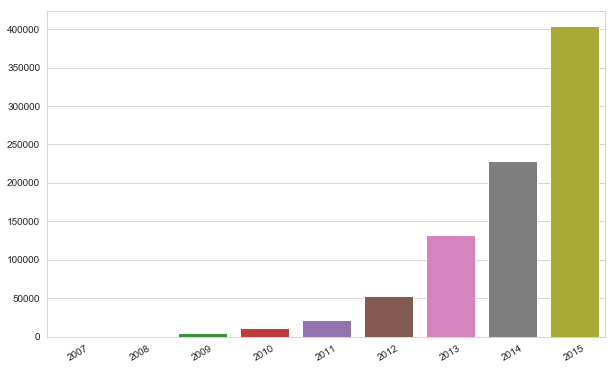

In [27]:
# Number of loans issued over 2007- 2015

years = xyzcorp.issue_d
# Taking only year from the issue date column and creating a new column
xyzcorp["year"] = years.dt.year

# Plotting the number of loans taken year wise
yearwise_loans = xyzcorp.year.value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(yearwise_loans.index, yearwise_loans.values)

# Making a seaborn barplot
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
print("Number of loans issued year wise")

# Conclusion: Exponential growth in number of loans issued every year

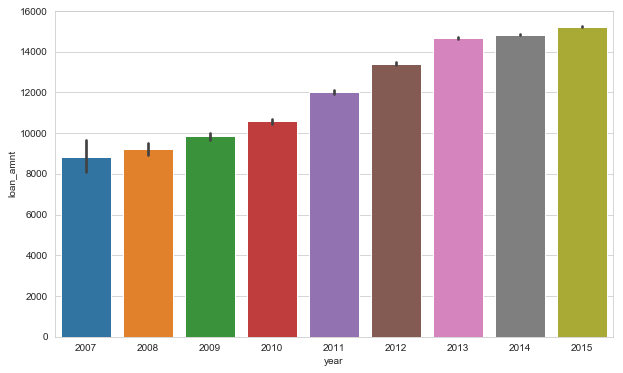

In [28]:
# Average loan amount issued over the years 2007- 2015 - PLotting a bar plot of average loan issued

plt.figure(figsize=(10,6))
sns.barplot(xyzcorp.year, xyzcorp.loan_amnt)

# Conclusion: Average loan issued also increased YoY

#### b: Good Loans (No Defaulters) vs Bad Loans (Defaulters):
Below graphs show, what is the amount of bad loans Lending Club has declared so far, keeping in mind, that there are still loans that are at a risk of defaulting in the future.

In [29]:
# Getting percentage of defaulters and non-defaulters
print('No Defaulters:', round(xyzcorp['default_ind'].value_counts()[0]/len(xyzcorp) * 100,2), '% of the dataset')
print('Defaulters:', round(xyzcorp['default_ind'].value_counts()[1]/len(xyzcorp) * 100,2), '% of the dataset')

No Defaulters: 94.57 % of the dataset
Defaulters: 5.43 % of the dataset


#### Conclusion from above output: we can see how imbalanced is our original dataset! Most of the transactions are non-defaulters. 
 If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and 
 our algorithms will probably overfit since it will "assume" that most transactions are not defaulters. 
 But we don't want our model to assume, we want our model to detect patterns that give signs of defaulters!
### # The classes are heavily skewed and we need to solve this issue. So we will be handling this class imbalance issue further while modelling.

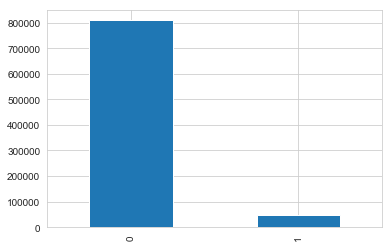

In [30]:
xyzcorp['default_ind'].value_counts().plot.bar()
# This graph shows that the classes are heavily skewed and we need to solve this issue.

Text(0.5, 1.0, 'Year wise Distribution of defaulter')

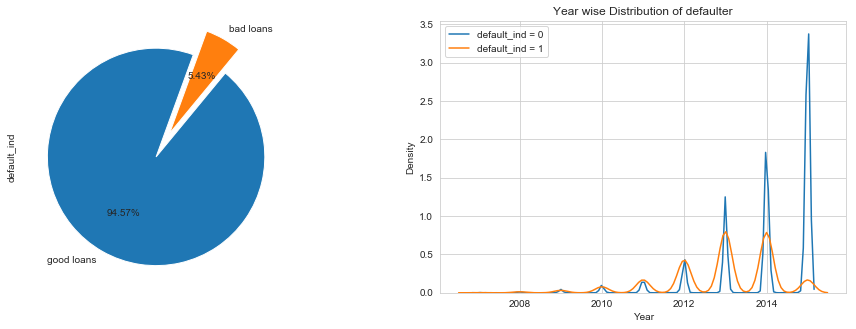

In [31]:
dt_series = pd.to_datetime(xyzcorp['issue_d'])
xyzcorp['year'] = dt_series.dt.year

fig, ax = plt.subplots(1, 2, figsize=(16,5))
xyzcorp['default_ind'].value_counts().plot.pie(explode=[0,0.25],labels=['good loans','bad loans'], autopct='%1.2f%%',startangle=70,ax=ax[0])

sns.kdeplot(xyzcorp.loc[xyzcorp['default_ind']==0, 'year'],label='default_ind = 0')
sns.kdeplot(xyzcorp.loc[xyzcorp['default_ind']==1, 'year'],label='default_ind = 1')
plt.xlabel('Year'); plt.ylabel('Density'); plt.title('Year wise Distribution of defaulter')

### Conclusion from the above graphs:
Above graph shows that bad loans consist 5.43% of total loans and still there are current loans which have the risk of becoming 
bad loans. (So this percentage is subjected to possible changes).  
Also, the classes are heavily skewed we need to solve this issue later.

### c: Loans Issued by Region
Below graphs analyze loans issued by region in order to see region patters that will allow us to understand which region gives Lending Club.

In [32]:
# to get the total loan amount, interest rate and annual income for each state

by_loan_amount = xyzcorp.groupby(['addr_state'], as_index=False).loan_amnt.sum()
by_interest_rate = xyzcorp.groupby(['addr_state'], as_index=False).int_rate.mean()
by_income = xyzcorp.groupby(['addr_state'], as_index=False).annual_inc.mean()

# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amnt'].values.tolist()
average_interest_rates = by_interest_rate['int_rate'].values.tolist()
average_annual_income = by_income['annual_inc'].values.tolist()

from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])
                     
metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df

,state_codes,issued_loans,interest_rate,annual_income
0,AK,3.579025e+07,13.57,76993.75
1,AL,1.573484e+08,13.70,68305.01
2,AR,8.994202e+07,13.41,65803.72
3,AZ,2.795973e+08,13.07,71748.35
4,CA,1.832342e+09,13.11,79313.86
5,CO,2.722562e+08,13.02,74630.24
6,CT,1.955669e+08,13.01,84736.31
7,DC,3.608975e+07,12.71,88229.86
8,DE,3.540888e+07,13.38,74565.53
9,FL,8.168243e+08,13.21,70243.80


### d: Importance of Credit Scores:
Credit scores are important metrics for assesing the overall level of risk. Below graphs will help us analyze the level of risk as a whole and how many loans were bad loans by the type of grade received in the credit score of the customer.

What we need to know:  
i.   The lower the grade of the credit score, the higher the risk for investors.  
ii.  There are different factors that influence on the level of risk of the loan.  
iii. There might be possible factors that contribute in whether a loan is bad or not (Factors that increase risk include: low annual income, high debt to income, high interest rates, low grade, among others).

Text(0.5, 1.0, 'Interest Rates by Credit Score')

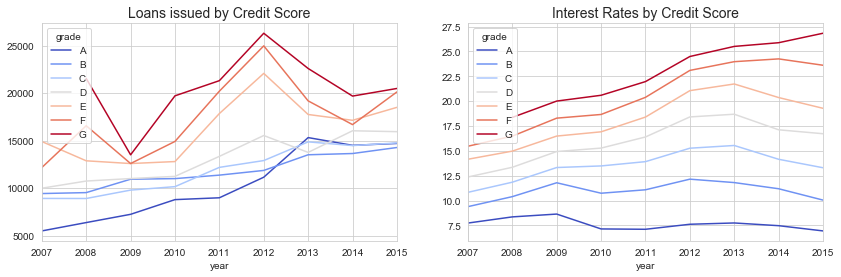

In [33]:
# Creating a colormap for Mean loan amount over the years 2007- 2015 grouped by credit score grade (grouping the data by year and grade and mean loan amount)
# To plot interest rates grouped by credit score grade
# G being the worst grade, A being the best

f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = xyzcorp.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)

by_inc = xyzcorp.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

# Conclusion: From Interest rate distribution by credit grade, we can see that worse grades have a substantially higher interest rate

Text(0, 0.5, 'Interest Rate (%)')

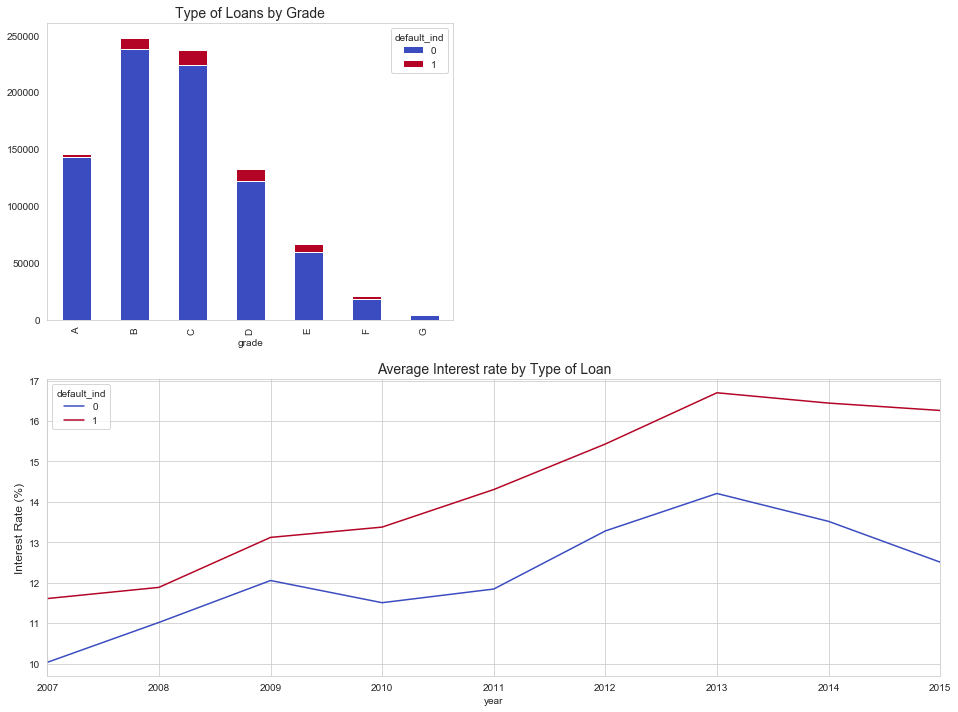

In [34]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(212)

cmap = plt.cm.coolwarm

loans_by_region = xyzcorp.groupby(['grade', 'default_ind']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)

by_interest = xyzcorp.groupby(['year', 'default_ind']).int_rate.mean()
by_interest.unstack().plot(ax=ax2, colormap=cmap)
ax2.set_title('Average Interest rate by Type of Loan', fontsize=14)
ax2.set_ylabel('Interest Rate (%)', fontsize=12)

### Conclusions from the above graphs:
i.   Scores that has lower grade received a larger amounts of loans (which might had contributed to a higher level of risk).  
ii.  Logically, the lower the grade the higher the interest the customer had to pay back to investors.  
iii. Customers with a grade of "C" were more likely to default on the loan.  
iv.  The types of bad loans in the last year are having a tendency to decline, except for late payments.  
v.   Factors such as a low credit grade or a high debt to income could be possible contributors in determining 
     whether a loan is at a high risk of being defaulted.

### e: Defaulted Loans and Level of Risk:
Since, we were interested in loans that are defaulted, we did an in-depth analysis of these types of Loans and found as to which features have a high correlation with the loan being defaulted.  
So we aimed to determine patters that allowed to understand somehow factors that contribute to a loan being defaulted

In [35]:
# With interest rate factor

xyzcorp['int_rate'].describe()
# Average interest is 13.26% Anything above this will be considered of high risk let's see if this is true.
xyzcorp['interest_payments'] = np.nan
lst = [xyzcorp]

for col in lst:
    col.loc[col['int_rate'] <= 13.23, 'interest_payments'] = 'Low'
    col.loc[col['int_rate'] > 13.23, 'interest_payments'] = 'High'
    
xyzcorp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,year,interest_payments
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011,Low
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,2011,High
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011,High
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011,High
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2011,Low


Text(0, 0.5, 'Count')

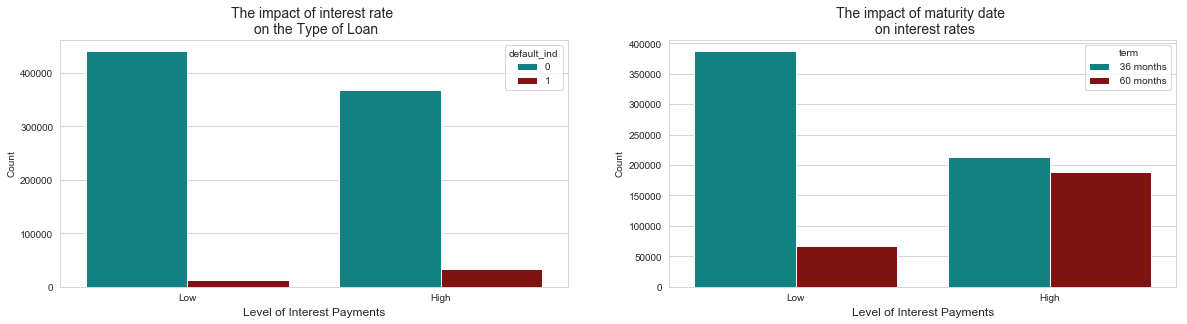

In [36]:
plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=xyzcorp, palette=palette, hue='default_ind')
ax.set_title('The impact of interest rate \n on the Type of Loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(222)
ax1 = sns.countplot(x='interest_payments', data=xyzcorp, palette=palette, hue='term')
ax1.set_title('The impact of maturity date \n on interest rates', fontsize=14)
ax1.set_xlabel('Level of Interest Payments', fontsize=12)
ax1.set_ylabel('Count')

### Conclusions from above graphs:  
i.  Loans that have a high interest rate(above 13.23%) are more likely to become a bad loan.  
ii. Loans that have a longer maturity date (60 months) are more likely to be a bad loan.

### 6. Condition of Loans and Purpose:  
Below graphs are ploted with the reasons for clients to apply for a loan. From these graphs we can conclude, if there are purposes that contribute to a "higher" risk of whether the loan will be repaid or not.

Text(0.5, 1.0, 'Purpose of loan')

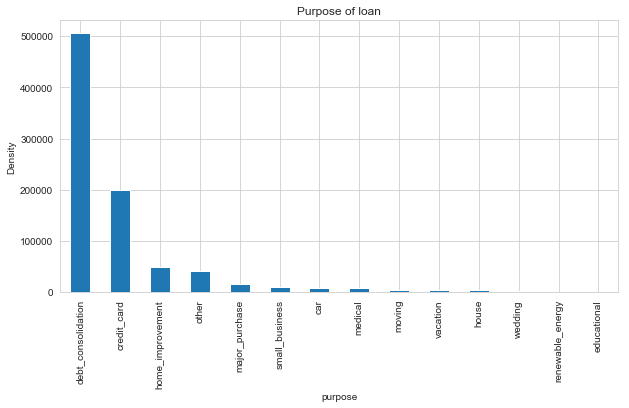

In [37]:
# Graph showing relation between the density of loans for each purpose

xyzcorp.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))
plt.xlabel('purpose'); plt.ylabel('Density'); plt.title('Purpose of loan')

In [38]:
#fig = plt.figure(figsize=(16,12))
#ax1 = fig.add_subplot(221)
#ax2 = fig.add_subplot(212)

#cmap = plt.cm.coolwarm

print(xyzcorp['purpose'].value_counts())
purpose_condition = round(pd.crosstab(xyzcorp['default_ind'], xyzcorp['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_good_loans = purpose_condition.values[0].tolist()
purpose_bad_loans = purpose_condition.values[1].tolist()
purpose_bad_loans.sort(reverse = True)
purpose_good_loans.sort(reverse = True)
print(purpose_bad_loans)
print(purpose_good_loans)
#purpose = purpose_condition.columns

#purpose_bad_loans.plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
#ax1.set_title('Bad Loans', fontsize=14)

#purpose_good_loans.plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
#ax1.set_title('Good Loans', fontsize=14)

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64
[17.18, 14.21, 11.62, 9.84, 8.45, 8.34, 7.33, 7.13, 6.12, 5.62, 5.35, 5.33, 4.64, 4.03]
[95.97, 95.36, 94.67, 94.65, 94.38, 93.88, 92.87, 92.67, 91.66, 91.55, 90.16, 88.38, 85.79, 82.82]


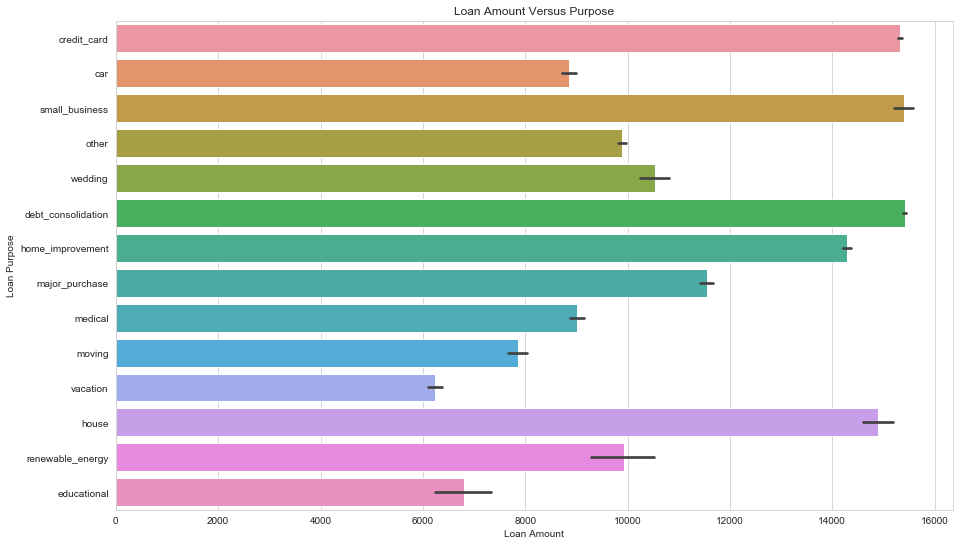

In [39]:
plt.figure(figsize=(15,9))
ax = sns.barplot(y="purpose", x="loan_amnt", data=xyzcorp)
ax = plt.xlabel('Loan Amount')
ax = plt.ylabel('Loan Purpose')
ax = plt.title('Loan Amount Versus Purpose')

# 3: Feature Engineering and Variable Transformations
Under this section, we will be manually going through each and every features selected from 2nd section and check if it is important or not and also handling missing values of each feature.

### Removing of not required features
There are features that are redundant or not required having no effect towards the "loan_condition", so we need to drop these features, scaling numeric features and encode categorical features from our dataframe. Checking for each feature manually to keep what we need and dropping the one not needed

In [40]:
# Employ Title- checking for its value as it might be a free text field or a list of currated employment titles, on the application form. 

print (xyzcorp.emp_title.value_counts().head())
print (xyzcorp.emp_title.value_counts().tail())
print(xyzcorp.emp_title.unique().shape)

Teacher             12965
Manager             10821
Registered Nurse     5341
RN                   5182
Owner                5157
Name: emp_title, dtype: int64
oral surgical assistant              1
Adventure Sports                     1
Facilities Maintenance Mechanic      1
Sr Deputy                            1
Director, Tissue Donor Services      1
Name: emp_title, dtype: int64
(290913,)


In [41]:
# Title - checking for its value as it an arbitrary free-text from the applicant

print (xyzcorp.title.value_counts().tail())

Killing the Debt for Good    1
My_Lending_Club_Loan         1
stress managment loan        1
zandercade                   1
AR Loan                      1
Name: title, dtype: int64


In [42]:
xyzcorp.verification_status.value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [43]:
# dropping the above columns as are not required for this level of analysis
xyzcorp.drop(['id', 'member_id', 'emp_title', 'zip_code', 'title','sub_grade','earliest_cr_line','next_pymnt_d',
              'last_pymnt_d', 'last_credit_pull_d','pymnt_plan','application_type','total_rev_hi_lim','tot_cur_bal','tot_coll_amt',
             'collections_12_mths_ex_med','collection_recovery_fee','recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp',
             'total_pymnt_inv','out_prncp_inv','out_prncp','acc_now_delinq','total_acc'], axis=1, inplace=True)

# checking the shape of the dataset
xyzcorp.shape

(855969, 28)

### b. Variable Transformations and handling missing values
To make a modelling ready dataset, we have to transform a few variables and handle missing values

In [44]:
# Transforming variable emp_length by extracting numbers from emp_length
xyzcorp['emp_length'] = xyzcorp['emp_length'].str.extract('(\d+)').astype(float)

In [45]:
# getting count of missing values for each feature
xyzcorp.isnull().sum().sort_values(ascending=False)

mths_since_last_delinq    439812
emp_length                 43061
revol_util                   446
interest_payments              0
purpose                        0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
addr_state                     0
year                           0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
initial_list_status            0
total_pymnt                    0
last_pymnt_amnt                0
default_ind                    0
loan_amnt                      0
dtype: int64

In [46]:
# Filling of the missing values

#mths_since_last_delinq missing values might need to be changed to a really high number.
#the reason for this is that we need to punish borrowers with small numbers in this feature.
#Missing values most likely mean the borrower has no delinquencies.

xyzcorp['mths_since_last_delinq'].max() #max is 188 so this will be our imputed value.
xyzcorp['mths_since_last_delinq'] = np.where(xyzcorp['mths_since_last_delinq'].isnull(), 188, xyzcorp['mths_since_last_delinq'])

# fill emp_length missing values with the median
xyzcorp['emp_length'] = xyzcorp['emp_length'].fillna(xyzcorp['emp_length'].median())

# fill revol_util missing values with the median
xyzcorp['revol_util'] = xyzcorp['revol_util'].fillna(xyzcorp['revol_util'].median())

In [47]:
# getting count of missing values for each feature
xyzcorp.isnull().sum().sort_values(ascending=False)

interest_payments         0
year                      0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
mths_since_last_delinq    0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
initial_list_status       0
total_pymnt               0
last_pymnt_amnt           0
default_ind               0
loan_amnt                 0
dtype: int64

In [48]:
# getting count of variables on the basis of data types
xyzcorp.dtypes.value_counts()

float64           17
object             8
int64              2
datetime64[ns]     1
dtype: int64

## Correlation Matrices
To understand the data further below is a correlation matrix to know if there are features that influence in whether a specific transaction is a fraud. Corelation matrix shows features which have a high positive or negative correlation with regards to fraud transactions

In [49]:
# Checking for correlations between different variables
corr = xyzcorp.corr()
corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,last_pymnt_amnt,default_ind,year
loan_amnt,1.000000,0.999265,0.997601,0.142966,0.944870,0.104210,0.335209,0.020189,-0.000739,-0.028928,0.010724,0.198926,-0.082199,0.337489,0.119586,0.479612,0.233596,-0.004907,0.099625
funded_amnt,0.999265,1.000000,0.998485,0.143116,0.945903,0.104460,0.335002,0.020583,-0.000424,-0.029279,0.010180,0.199432,-0.081858,0.337405,0.120098,0.478290,0.233134,-0.005797,0.104442
funded_amnt_inv,0.997601,0.998485,1.000000,0.143374,0.944149,0.105573,0.334356,0.021489,0.000050,-0.030462,0.010444,0.200055,-0.081008,0.336870,0.120880,0.474600,0.232029,-0.008209,0.117050
int_rate,0.142966,0.143116,0.143374,1.000000,0.130468,0.010198,-0.073825,0.078454,0.055400,0.231705,-0.083174,-0.011091,0.052596,-0.035344,0.271614,0.173387,0.107346,0.155037,-0.064987
installment,0.944870,0.945903,0.944149,0.130468,1.000000,0.088814,0.328578,0.013909,0.007224,0.001659,-0.002322,0.183817,-0.071114,0.320017,0.131872,0.520613,0.243246,0.004753,0.070633
emp_length,0.104210,0.104460,0.105573,0.010198,0.088814,1.000000,0.063700,0.019942,0.025209,-0.006167,-0.049817,0.038269,0.030679,0.087765,0.034936,0.049255,0.028018,-0.013833,0.045583
annual_inc,0.335209,0.335002,0.334356,-0.073825,0.328578,0.063700,1.000000,-0.086821,0.047749,0.037251,-0.059875,0.139429,-0.008909,0.298569,0.036742,0.163226,0.092662,-0.037066,0.036780
dti,0.020189,0.020583,0.021489,0.078454,0.013909,0.019942,-0.086821,1.000000,-0.002677,-0.005860,0.012378,0.142068,-0.022717,0.067119,0.086638,-0.040537,-0.028601,0.004429,0.076990
delinq_2yrs,-0.000739,-0.000424,0.000050,0.055400,0.007224,0.025209,0.047749,-0.002677,1.000000,0.022930,-0.455451,0.051502,-0.011081,-0.031807,-0.016283,-0.031777,-0.018805,-0.009186,0.062540
inq_last_6mths,-0.028928,-0.029279,-0.030462,0.231705,0.001659,-0.006167,0.037251,-0.005860,0.022930,1.000000,-0.030044,0.116532,0.059430,-0.018683,-0.088336,0.080476,0.065455,0.074407,-0.103853


In [50]:
# Checking of correlation of all independent variables with dependent variable

corr['default_ind'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,default_ind,1.000000
1,int_rate,0.155037
2,inq_last_6mths,0.074407
3,revol_util,0.044479
4,mths_since_last_delinq,0.018512
5,installment,0.004753
6,dti,0.004429
7,loan_amnt,-0.004907
8,funded_amnt,-0.005797
9,funded_amnt_inv,-0.008209


### Label Encoding:

In [51]:
#To deal with variables containing multiple labels which can be in the form of words or numbers we will use Label Encoder,
# which converts the labels into numeric form so as to convert it into the machine-readable form. It Encodes labels with value 
# between 0 and n_classes-1.

le_xyzcorp = LabelEncoder()
categorical_feature = xyzcorp.dtypes==object
print(categorical_feature.value_counts())
categorical_cols = xyzcorp.columns[categorical_feature].tolist()
xyzcorp[categorical_cols] = xyzcorp[categorical_cols].apply(lambda col: le_xyzcorp.fit_transform(col))

False    20
True      8
dtype: int64


In [52]:
# getting count of datatypes after encoding, we can see that 7 variables with datatype object have been changed to integer
xyzcorp.dtypes.value_counts()

float64           17
int32              8
int64              2
datetime64[ns]     1
dtype: int64

In [53]:
# copy of cleaned data
xyzcorp_CleanedData_bkp = xyzcorp.copy()

In [54]:
xyzcorp.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,total_pymnt,last_pymnt_amnt,default_ind,year,interest_payments
count,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,14745.571335,14732.378305,14700.061226,0.298782,13.192320,436.238072,1.777849,6.097333,2.895954,7.507119e+04,1.026061,NaN,2.562310,23.135392,18.122165,0.311621,0.680915,113.200822,11.542447,0.194537,1.691053e+04,55.019863,0.482978,7653.296336,2225.985295,0.054286,2014.023618,0.529518
std,8425.340005,8419.471653,8425.805478,0.457724,4.368365,243.726876,1.304639,3.445121,1.921844,6.426447e+04,0.792215,NaN,2.271336,15.156354,17.423629,0.857189,0.964033,78.392952,5.308094,0.581585,2.222374e+04,23.805389,0.499710,7909.383591,4864.966593,0.226581,1.238360,0.499128
min,500.000000,500.000000,0.000000,0.000000,5.320000,15.690000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,0.000000,9.990000,260.550000,1.000000,3.000000,1.000000,4.500000e+04,0.000000,NaN,2.000000,9.000000,11.880000,0.000000,0.000000,32.000000,8.000000,0.000000,6.469000e+03,37.600000,0.000000,1969.690000,285.420000,0.000000,2013.000000,0.000000


In [55]:
# Method to convert the one hot encoded variables to category to implement One Hot Encoding further.
def convert_cat(df):
    for n,c in df.items():
        if df[n].dtype == 'int':
            df[n] = c.astype('category').cat.as_ordered()

In [56]:
# calling of method "convert_cat" on the dataset
convert_cat(xyzcorp)

# checking for the datatypes count after converting to category
print(xyzcorp.dtypes.value_counts())

float64           17
category           3
int64              2
category           1
category           1
category           1
category           1
category           1
datetime64[ns]     1
dtype: int64


In [57]:
# displaying number of unique values exsisting in each category variable
xyzcorp.select_dtypes('category').apply(pd.Series.nunique, axis = 0)

term                    2
grade                   7
home_ownership          6
verification_status     3
purpose                14
addr_state             51
initial_list_status     2
interest_payments       2
dtype: int64

## Sampling of Dataset:  
The data has been divided into train (June 2007 - May 2015) and out-of-time test (June 2015 - Dec 2015) data.  
We will be using training data to build models/analytical solution and finally apply it to test data to measure the performance and robustness of the models. 

In [58]:
## Sampling on the basis of issue_d

train_xyz = xyzcorp[xyzcorp['issue_d'] < '2015-6-01']      # train dataset, on which model will be build
oot_test_xyz = xyzcorp[xyzcorp['issue_d'] >= '2015-6-01']  # test dataset, on which final model will be tested

print(train_xyz.shape)    # prints shape of train dataset
print(oot_test_xyz.shape) # prints shape of test dataset

(598978, 28)
(256991, 28)


In [59]:
# Align the training and testing data, keeping only columns present in both dataframes
train_xyz, oot_test_xyz = train_xyz.align(oot_test_xyz, join = 'inner', axis = 1)

print(train_xyz.shape)
print(oot_test_xyz.shape)

(598978, 28)
(256991, 28)


In [60]:
# dropping issue_d column from train and test dataset
train_xyz.drop(['issue_d'], axis=1, inplace=True)
oot_test_xyz.drop(['issue_d'], axis=1, inplace=True)

print(train_xyz.shape); print(oot_test_xyz.shape)

(598978, 27)
(256991, 27)


### Feature Selection using chi2 method:

In [61]:
# Sampling for chi2 - creating x and y for chi2 method
chi_x= train_xyz.copy()
chi_y = train_xyz['default_ind']
print(chi_x.shape);

chi_x_test= oot_test_xyz.copy()
print(chi_x_test.shape);

(598978, 27)
(256991, 27)


In [62]:
# selecting the 18 features from the sampled train dataset which have the most impact on analsing for defaulter
chi_selector = SelectKBest(chi2, k=18)
chi_selector.fit(chi_x, chi_y)

chi_support = chi_selector.get_support()
chi_feature = chi_x.loc[:,chi_support].columns.tolist()
print('selected features = ', str(len(chi_feature)))
print(chi_feature,'\n')
print('total features from original train dataset = ', str(len(train_xyz.columns)))

X_selFi = chi_x.loc[:,chi_support]
chi_x_test = chi_x_test.loc[:,chi_support]
print(X_selFi.shape); print(chi_x_test.shape)

selected features =  18
['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'grade', 'home_ownership', 'annual_inc', 'purpose', 'dti', 'inq_last_6mths', 'mths_since_last_delinq', 'revol_bal', 'revol_util', 'initial_list_status', 'total_pymnt', 'last_pymnt_amnt', 'default_ind', 'interest_payments'] 

total features from original train dataset =  27
(598978, 18)
(256991, 18)


In [63]:
# Chi2 - OneHotEncoding on train and test (performs a one-hot encoding of integer ordinal features.)
X_model_train_selFi = pd.get_dummies(X_selFi).astype(float)
chi_y = X_model_train_selFi['default_ind']
X_model_train_selFi.drop(['default_ind'], axis=1, inplace=True)
print(X_model_train_selFi.shape); print(chi_y.shape)

X_model_test_selFi = pd.get_dummies(chi_x_test).astype(float)
chi_y_test = X_model_test_selFi['default_ind']
X_model_test_selFi.drop(['default_ind'], axis=1, inplace=True)
print(X_model_test_selFi.shape); print(chi_y_test.shape)

X_scaled_model_train_selFi = preprocessing.scale(X_model_train_selFi)
print(X_scaled_model_train_selFi.shape)
X_scaled_model_test_selFi = preprocessing.scale(X_model_test_selFi)
print(X_scaled_model_test_selFi.shape)

(598978, 43)
(598978,)
(256991, 43)
(256991,)
(598978, 43)
(256991, 43)


In [64]:
# With All Features - OneHotEncoder : performs a one-hot encoding of integer ordinal features. The OneHotEncoder assumes that input features, 
# categorical in nature, take on values in the range [0, max(feature)] instead of using the unique values. The encoder finds 
# maximum value per feature and transforms the data to a binary one-hot encoding so that the variables can be used by models.

# printing shape of dataset before encoding
print(train_xyz.shape, oot_test_xyz.shape)

X_model_train = pd.get_dummies(train_xyz).astype(float)
y_model_train = train_xyz['default_ind']
X_model_train.drop(['default_ind'], axis=1, inplace=True)

X_model_valid = pd.get_dummies(oot_test_xyz).astype(float)
y_model_valid = oot_test_xyz['default_ind']
X_model_valid.drop(['default_ind'], axis=1, inplace=True)

# printing shape of dataset after encoding
print(X_model_train.shape, y_model_train.shape, X_model_valid.shape, y_model_valid.shape)

(598978, 27) (256991, 27)
(598978, 105) (598978,) (256991, 105) (256991,)


# 4. Model Building and Validation

### Pre-Processing

In [65]:
# All Features - Data Scaling - needed to normalise the data within a particular range. Since the features are all on different scale, we are rescaling it in the range -1, +1
X_scaled_model_train = preprocessing.scale(X_model_train)
X_scaled_model_valid = preprocessing.scale(X_model_valid)

print(X_scaled_model_train.shape, X_scaled_model_valid.shape)

(598978, 105) (256991, 105)


## A. Model building with all the Features:

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled_model_train, y_model_train.values, 
                                                    test_size=0.4, random_state=0)
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_valid), len(y_valid)))

Length of X (train): 359386 | Length of y (train): 359386
Length of X (test): 239592 | Length of y (test): 239592


In [75]:
#Model function - to predict confusion matrix, accuracy, Precision score, Recall score, ROC score and Classification report

def model(dtrain_X,dtrain_Y,dtest_X,dtest_Y):
    
    ## Instance creation of different models
    logit = LogisticRegression(); rfc = RandomForestClassifier(); dtc = DecisionTreeClassifier()
    
    cols = ['Model_Name','Accuracy_score','Precision_score','Roc_auc_score','Recall_score','f1_score']
    final_rep = pd.DataFrame(columns = cols)
    inst = {logit,rfc,dtc}
    
    for algorithm in inst:
        name = ""
        if(algorithm == logit):
            name = 'Logistic'
            print("\n\nLogistic Regression Model:- ")
        elif (algorithm == rfc):
            name = 'Random Forest'
            print("\n\nRandom Forest Model:- ")
        elif (algorithm == dtc):
            name = 'Decision Tree'
            print("\n\nDecision Tree Model:- ")
        
        algorithm.fit(dtrain_X,dtrain_Y)
        predictions = algorithm.predict(dtest_X)
        y_score = algorithm.predict_proba(dtest_X)[:,1]
        tmp1 = pd.Series({'Model_Name': name,'Accuracy_score': accuracy_score(dtest_Y, predictions),
                         'Precision_score': precision_score(dtest_Y,predictions),'Roc_auc_score': roc_auc_score(dtest_Y,y_score),
                         'Recall_score': recall_score(dtest_Y, predictions),'f1_score': f1_score(dtest_Y, predictions)})
        #print (algorithm)
        print("Confusion Matrix : \n", confusion_matrix(dtest_Y,predictions))
        print("Accuracy score  : ", accuracy_score(dtest_Y, predictions))
        print("Precision score : ", precision_score(dtest_Y,predictions))
        print("ROC_auc_score   : ", roc_auc_score(dtest_Y,y_score))
        print("Recall/Sensitivity/TPR score   : ", recall_score(dtest_Y, predictions))
        print("f1_score        : ", f1_score(dtest_Y, predictions))
        
        fpr, tpr, thresholds = roc_curve(dtest_Y, y_score, drop_intermediate = False, pos_label = 1)
        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve')
        plt.plot(fpr, tpr, label = name )
        plt.legend(loc=2, prop={'size':11})
        plt.plot([0,1],[0,1], color = 'black')
        
        final_rep = final_rep.append(tmp1, ignore_index = True)
        final_rep = final_rep.sort_values(by ='Model_Name')
        
    return final_rep



Logistic Regression Model:- 
Confusion Matrix : 
 [[220237    860]
 [ 16653   1842]]
Accuracy score  :  0.9269049050051754
Precision score :  0.6817172464840858
ROC_auc_score   :  0.8407841824841643
Recall/Sensitivity/TPR score   :  0.09959448499594485
f1_score        :  0.1737981789875926


Decision Tree Model:- 
Confusion Matrix : 
 [[214187   6910]
 [  6708  11787]]
Accuracy score  :  0.9431617082373368
Precision score :  0.6304219928330749
ROC_auc_score   :  0.8030270647687339
Recall/Sensitivity/TPR score   :  0.6373073803730738
f1_score        :  0.6338459883845988


Random Forest Model:- 
Confusion Matrix : 
 [[220671    426]
 [ 14019   4476]]
Accuracy score  :  0.9397100070119203
Precision score :  0.9130966952264382
ROC_auc_score   :  0.8447788869206869
Recall/Sensitivity/TPR score   :  0.24201135442011354
f1_score        :  0.3826131555327606

Final Report with All Features:- 

      Model_Name  Accuracy_score  Precision_score  Roc_auc_score  Recall_score  f1_score
0  Decisi

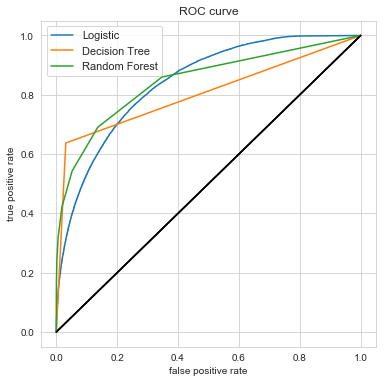

In [77]:
# Calling of method 'model' for all features
final_report = model(X_train,y_train,X_valid,y_valid)
print("\nFinal Report with All Features:- \n")
print(final_report)

## B. Model building with selected Features from chi2 method

In [78]:
# splitting data using sampling of chi2 selected features

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled_model_train_selFi, chi_y.values, 
                                                    test_size=0.4, random_state=0)
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_valid), len(y_valid)))

Length of X (train): 359386 | Length of y (train): 359386
Length of X (test): 239592 | Length of y (test): 239592




Logistic Regression Model:- 
Confusion Matrix : 
 [[220237    860]
 [ 16653   1842]]
Accuracy score  :  0.9269049050051754
Precision score :  0.6817172464840858
ROC_auc_score   :  0.8407841824841643
Recall/Sensitivity/TPR score   :  0.09959448499594485
f1_score        :  0.1737981789875926


Decision Tree Model:- 
Confusion Matrix : 
 [[214158   6939]
 [  6674  11821]]
Accuracy score  :  0.9431825770476476
Precision score :  0.6301172707889126
ROC_auc_score   :  0.8038806500364228
Recall/Sensitivity/TPR score   :  0.6391457150581238
f1_score        :  0.6345993826332036


Random Forest Model:- 
Confusion Matrix : 
 [[220672    425]
 [ 13908   4587]]
Accuracy score  :  0.9401774683628835
Precision score :  0.9152035115722267
ROC_auc_score   :  0.848723443271795
Recall/Sensitivity/TPR score   :  0.24801297648012977
f1_score        :  0.39026672905942905

Final Report with selected Features:- 

      Model_Name  Accuracy_score  Precision_score  Roc_auc_score  Recall_score  f1_score
0  D

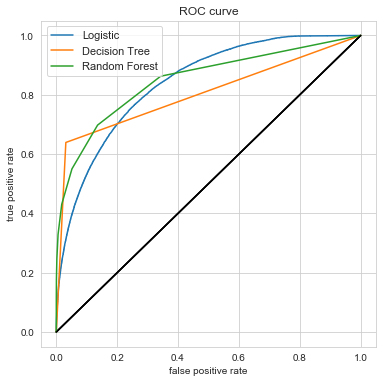

In [72]:
# calling method 'model' for selected features

final_report_selFe = model(X_train,y_train,X_valid,y_valid)
print("\nFinal Report with selected Features:- \n")
print(final_report_selFe)

In [79]:
# Comparison of both reports of, All Features and Selected Features to select the Best Model

print("Report of All Features: \n")
print(final_report)
print("\nReport of Selected Features: \n")
print(final_report_selFe)

Report of All Features: 

      Model_Name  Accuracy_score  Precision_score  Roc_auc_score  Recall_score  f1_score
0  Decision Tree        0.943162         0.630422       0.803027      0.637307  0.633846
1       Logistic        0.926905         0.681717       0.840784      0.099594  0.173798
2  Random Forest        0.939710         0.913097       0.844779      0.242011  0.382613

Report of Selected Features: 

      Model_Name  Accuracy_score  Precision_score  Roc_auc_score  Recall_score  f1_score
0  Decision Tree        0.943183         0.630117       0.803881      0.639146  0.634599
1       Logistic        0.926905         0.681717       0.840784      0.099594  0.173798
2  Random Forest        0.940177         0.915204       0.848723      0.248013  0.390267


# After OverSampling

In [80]:
# OverSampling with All features train and test dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled_model_train, y_model_train.values, 
                                                    test_size=0.4, random_state=0)
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_valid), len(y_valid)))

Length of X (train): 359386 | Length of y (train): 359386
Length of X (test): 239592 | Length of y (test): 239592


In [81]:
# OverSampling
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_train, y_train)
print(X_res.shape)
print(y_res.shape)

(663450, 105)
(663450,)




Logistic Regression Model:- 
Confusion Matrix : 
 [[185125  35972]
 [  3039  15456]]
Accuracy score  :  0.837177368192594
Precision score :  0.3005366726296959
ROC_auc_score   :  0.9124076466785676
Recall/Sensitivity/TPR score   :  0.8356853203568532
f1_score        :  0.44208629492441687


Random Forest Model:- 
Confusion Matrix : 
 [[220656    441]
 [ 10284   8211]]
Accuracy score  :  0.9552364018832015
Precision score :  0.9490291262135923
ROC_auc_score   :  0.934943701789241
Recall/Sensitivity/TPR score   :  0.44395782643957826
f1_score        :  0.6049287214056801


Decision Tree Model:- 
Confusion Matrix : 
 [[217454   3643]
 [  3442  15053]]
Accuracy score  :  0.9704288957895089
Precision score :  0.805145485665383
ROC_auc_score   :  0.8987093582662381
Recall/Sensitivity/TPR score   :  0.8138956474722898
f1_score        :  0.8094969212981636

Final Report with Over Sampled Dataset:- 

      Model_Name  Accuracy_score  Precision_score  Roc_auc_score  Recall_score  f1_score
2  D

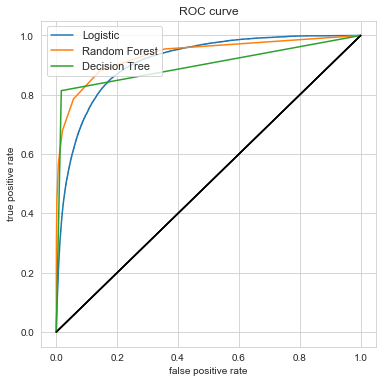

In [82]:
final_report_OverSample = model(X_res,y_res,X_valid,y_valid)
print("\nFinal Report with Over Sampled Dataset:- \n")
print(final_report_OverSample)

In [286]:
# Comparison of the three reports of, All Features and Selected Features and Over Sampling, to select the Best Model
print("Report of All Features: \n")
print(final_report)
print("\nReport of Selected Features: \n")
print(final_report_selFe)
print("\nReport after Over Sampling: \n")
print(final_report_OverSample)

Report of All Features: 

      Model_Name  Accuracy_score  Precision_score  Roc_auc_score  Recall_score  f1_score
0  Decision Tree            0.97             0.81           0.91          0.83      0.82
2       Logistic            0.94             0.73           0.91          0.34      0.46
1  Random Forest            0.95             0.98           0.92          0.39      0.56

Report of Selected Features: 

      Model_Name  Accuracy_score  Precision_score  Roc_auc_score  Recall_score  f1_score
0  Decision Tree            0.94             0.63           0.80          0.64      0.63
2       Logistic            0.93             0.68           0.84          0.10      0.17
1  Random Forest            0.94             0.91           0.84          0.23      0.36

Report after Over Sampling: 

      Model_Name  Accuracy_score  Precision_score  Roc_auc_score  Recall_score  f1_score
0  Decision Tree            0.97             0.80           0.90          0.81      0.81
1       Logistic     

## Final Model

In [83]:
pd.options.display.float_format = '{:.2f}'.format

In [84]:
# Method to predict scores, accuracy, confusion matrix, roc curve on the final model

def logistic_model(dtrain_X,dtrain_Y,dtest_X,dtest_Y,Loan_Id,member_id):
    
    ## Instance creation of different models
    logit = LogisticRegression()
       
    cols = ['Model_Name','Accuracy_score','Precision_score','Roc_auc_score','Recall_score','f1_score']
    final_rep = pd.DataFrame(columns = cols)
    name = ""
    
    print("\n\nLogistic Regression Model:- ")
    name = "Logistic"   
        
    logit.fit(dtrain_X,dtrain_Y)
    predictions = logit.predict(dtest_X)
    y_score = logit.predict_proba(dtest_X)[:,1]
    pred_prob = logit.predict_proba(dtest_X)
    
    log_tmp = pd.Series({'Model_Name': name,'Accuracy_score': accuracy_score(dtest_Y, predictions),
                         'Precision_score': precision_score(dtest_Y,predictions),'Roc_auc_score': roc_auc_score(dtest_Y,y_score),
                         'Recall_score': recall_score(dtest_Y, predictions),'f1_score': f1_score(dtest_Y, predictions)})
    #print (logit)
    print("Confusion Matrix : \n", confusion_matrix(dtest_Y,predictions))
    print("Accuracy score  : ", accuracy_score(dtest_Y, predictions))
    print("Precision score : ", precision_score(dtest_Y,predictions))
    print("ROC_auc_score   : ", roc_auc_score(dtest_Y,y_score))
    print("Recall/Sensitivity/TPR score   : ", recall_score(dtest_Y, predictions))
    print("f1_score        : ", f1_score(dtest_Y, predictions))
    
    log_final_rep = final_rep.append(log_tmp, ignore_index = True)
    print("\nFinal Report with Logistic Model:- \n")
    print(log_final_rep)
    
    fpr, tpr, thresholds = roc_curve(dtest_Y, y_score, drop_intermediate = False, pos_label = 1)
    plt.figure(1, figsize=(6,6))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('ROC curve')
    plt.plot(fpr, tpr, label = name )
    plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    cm1 = confusion_matrix(dtest_Y,predictions)
    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Sensitivity : ', sensitivity1 )
    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Specificity : ', specificity1)
    
    print("\n Displaying List of Defaulters in descending order on the basis of probability: -\n")
    df1 = pd.DataFrame(pred_prob)
    df1["Loan_Id"] = Loan_Id
    df1["Member_Id"] = member_id
    df1.columns = ["Class_0","Class_1","Loan_Id","Member_Id"]
    df2 = df1[df1['Class_1'] > 0.37]
    print(df2.sort_values(['Class_1'], ascending=False))
    #df2.to_excel('data_set_2.xlsx')
    df2.to_csv(r'F:\Ranjana\DataScience\export_dataframe.csv', index = None, header=True)
    

In [85]:
# creating train and test with original train and test samples

X_train, y_train = ros.fit_resample(X_scaled_model_train, y_model_train)
X_test, y_test = X_scaled_model_valid, y_model_valid



Logistic Regression Model:- 
Confusion Matrix : 
 [[238233  18447]
 [   212     99]]
Accuracy score  :  0.9273943445490309
Precision score :  0.005338078291814947
ROC_auc_score   :  0.7780942477452627
Recall/Sensitivity/TPR score   :  0.3183279742765273
f1_score        :  0.010500079546057167

Final Report with Logistic Model:- 

  Model_Name  Accuracy_score  Precision_score  Roc_auc_score  Recall_score  f1_score
0   Logistic            0.93             0.01           0.78          0.32      0.01
Sensitivity :  0.9281323048153343
Specificity :  0.3183279742765273

 Displaying List of Defaulters in descending order on the basis of probability: -

        Class_0  Class_1   Loan_Id  Member_Id
10305      0.00     1.00    834082    1043889
56704      0.00     1.00   8636799   10408771
7846       0.00     1.00    740758     938523
896        0.00     1.00   1056831    1288385
938        0.00     1.00   1058318    1289905
1081       0.00     1.00   1056155    1287930
11186      0.00     1.

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\Ranjana\\DataScience\\export_dataframe.csv'

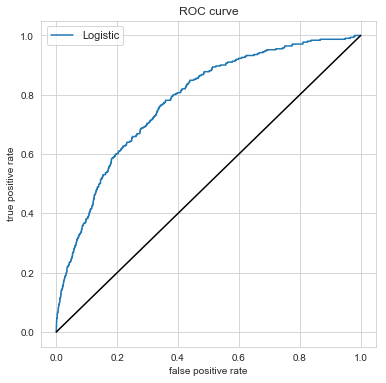

In [87]:
# calling of logistic regression predictor method 

Loan_Id_Org = xyzcorp_bkp.id
Member_Id_Org = xyzcorp_bkp.member_id
logistic_model(X_train,y_train,X_test,y_test,Loan_Id_Org,Member_Id_Org)